# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from newsapi import NewsApiClient
%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/juanizquierdo/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
In /Users/juanizquierdo/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/juanizquierdo/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/juanizquierdo/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


In [2]:
# Read your api key environment variable
# YOUR CODE HERE!
load_dotenv("API_KEYS.env")

True

In [3]:
newsapi_key= os.getenv("NEWS_API")

In [4]:
type(newsapi_key)

str

In [5]:
from newsapi import NewsApiClient
%matplotlib inline

In [6]:
# Create a newsapi client
# YOUR CODE HERE!
newsapi = NewsApiClient(newsapi_key)

In [7]:
# Fetch the Bitcoin news articles
# YOUR CODE HERE!
bitcoin_articles = newsapi.get_everything(q="Bitcoin")['articles']

In [8]:
# Fetch the Ethereum news articles
# YOUR CODE HERE!
ethereum_articles = newsapi.get_everything(q="Ethereum")['articles']

In [9]:
# Create the Bitcoin sentiment scores DataFrame
# YOUR CODE HERE!
bitcoin_sentiments = []
for article in bitcoin_articles:
    text=article["content"]
    sentiment=analyzer.polarity_scores(text)
    compound = sentiment["compound"]
    neu = sentiment["neu"]
    neg = sentiment["neg"]
    pos = sentiment["pos"]
    bitcoin_sentiments.append({
            "text": text,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
    })

bitcoin_sentiments_df = pd.DataFrame(bitcoin_sentiments)
bitcoin_sentiments_df

,compound,negative,neutral,positive,text
0,0.8402,0.000,0.718,0.282,El Salvador's President Nayib Bukele has made ...
1,0.1280,0.000,0.957,0.043,El Salvador has become the first country in th...
2,0.0000,0.000,1.000,0.000,Illustration by Alex Castro / The Verge\r\n\n ...
3,0.6908,0.000,0.831,0.169,"It's all about clean energy, it seems. \r\nElo..."
4,-0.2023,0.087,0.847,0.066,"Bitcoin, Ethereum and a host of Altcoins suffe..."
5,-0.7627,0.180,0.820,0.000,Now isn't the greatest time to be a cryptocurr...
6,0.2732,0.000,0.940,0.060,image captionThe move means bitcoin will be ac...
7,0.5574,0.000,0.893,0.107,"Several crypto fans that descended on Miami, F..."
8,0.7500,0.000,0.846,0.154,"Hello friends, and welcome back to Week in Rev..."
9,-0.5267,0.096,0.904,0.000,In spite of the environmental and regulatory i...


In [10]:
# Create the Ethereum sentiment scores DataFrame
# YOUR CODE HERE!
ethereum_sentiments = []
for article in ethereum_articles:
    text=article["content"]
    sentiment=analyzer.polarity_scores(text)
    compound = sentiment["compound"]
    pos = sentiment["pos"]
    neu = sentiment["neu"]
    neg = sentiment["neg"]
    ethereum_sentiments.append({
            "text": text,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
    })

ethereum_sentiments_df = pd.DataFrame(ethereum_sentiments)
ethereum_sentiments_df

,compound,negative,neutral,positive,text
0,0.0000,0.000,1.000,0.000,TL;DR: The Cryptocurrency with Ethereum and So...
1,-0.2023,0.087,0.847,0.066,"Bitcoin, Ethereum and a host of Altcoins suffe..."
2,0.0000,0.000,0.000,0.000,
3,-0.2732,0.068,0.932,0.000,"Ethereum, the second largest cryptocurrency af..."
4,0.0000,0.000,1.000,0.000,A representation of virtual currency Ethereum ...
5,-0.3612,0.132,0.801,0.067,GPU shortages and inflated prices have become ...
6,0.0000,0.000,1.000,0.000,Illustration by Alex Castro / The Verge\r\n\n ...
7,-0.3400,0.066,0.934,0.000,This article was translated from our Spanish e...
8,0.2732,0.000,0.932,0.068,Ethereum will reduce its energy consumption by...
9,0.0000,0.000,1.000,0.000,This new mining feature is called 'Norton Cryp...


In [11]:
# Describe the Bitcoin Sentiment
# YOUR CODE HERE!
bitcoin_sentiments_df.describe()

,compound,negative,neutral,positive
count,20.000000,20.000000,20.000000,20.000000
mean,0.088490,0.030750,0.910100,0.059150
std,0.439852,0.052544,0.073905,0.073436
min,-0.762700,0.000000,0.718000,0.000000
25%,-0.202300,0.000000,0.853750,0.000000
50%,0.064000,0.000000,0.923500,0.044000
75%,0.369700,0.067250,0.957000,0.073250
max,0.840200,0.180000,1.000000,0.282000


In [12]:
# Describe the Ethereum Sentiment
# YOUR CODE HERE!
ethereum_sentiments_df.describe()

,compound,negative,neutral,positive
count,20.000000,20.000000,20.000000,20.000000
mean,-0.092850,0.050600,0.866250,0.033150
std,0.353291,0.077435,0.220665,0.049434
min,-0.868900,0.000000,0.000000,0.000000
25%,-0.345300,0.000000,0.838250,0.000000
50%,0.000000,0.000000,0.932000,0.000000
75%,0.032000,0.081750,1.000000,0.066250
max,0.670500,0.286000,1.000000,0.188000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin

Q: Which coin had the highest compound score?

A: Bitcoin

Q. Which coin had the highest positive score?

A: Bitcoin

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [13]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [14]:
# Instantiate the lemmatizer
# YOUR CODE HERE!
lemmatizer = WordNetLemmatizer()
# Create a list of stopwords
# YOUR CODE HERE!
sw = set(stopwords.words('english'))
# Expand the default stopwords list if necessary
# YOUR CODE HERE!

In [15]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
    # Create a tokenized list of the words
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    # Lemmatize words into root words
    # Remove the stop words
    tokens = [word.lower() for word in lem if word.lower() not in sw]
    
    return tokens

In [16]:
# Create a new tokens column for Bitcoin
# YOUR CODE HERE!
bitcoin_sentiments_df["tokens"] = [tokenizer(text) for text in bitcoin_sentiments_df["text"]]
bitcoin_sentiments_df.head(5)

,compound,negative,neutral,positive,text,tokens
0,0.8402,0.000,0.718,0.282,El Salvador's President Nayib Bukele has made ...,"[el, salvadors, president, nayib, bukele, ha, ..."
1,0.1280,0.000,0.957,0.043,El Salvador has become the first country in th...,"[el, salvador, ha, become, first, country, wor..."
2,0.0000,0.000,1.000,0.000,Illustration by Alex Castro / The Verge\r\n\n ...,"[illustration, alex, castro, verge, cryptocurr..."
3,0.6908,0.000,0.831,0.169,"It's all about clean energy, it seems. \r\nElo...","[clean, energy, seemselon, musk, tesla, caused..."
4,-0.2023,0.087,0.847,0.066,"Bitcoin, Ethereum and a host of Altcoins suffe...","[bitcoin, ethereum, host, altcoins, suffered, ..."


In [17]:
# Create a new tokens column for Ethereum
# YOUR CODE HERE!
ethereum_sentiments_df["tokens"] = [tokenizer(text) for text in ethereum_sentiments_df["text"]]
ethereum_sentiments_df.head(5)

,compound,negative,neutral,positive,text,tokens
0,0.0000,0.000,1.000,0.000,TL;DR: The Cryptocurrency with Ethereum and So...,"[tldr, cryptocurrency, ethereum, solidity, blo..."
1,-0.2023,0.087,0.847,0.066,"Bitcoin, Ethereum and a host of Altcoins suffe...","[bitcoin, ethereum, host, altcoins, suffered, ..."
2,0.0000,0.000,0.000,0.000,,[]
3,-0.2732,0.068,0.932,0.000,"Ethereum, the second largest cryptocurrency af...","[ethereum, second, largest, cryptocurrency, bi..."
4,0.0000,0.000,1.000,0.000,A representation of virtual currency Ethereum ...,"[representation, virtual, currency, ethereum, ..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [18]:
from collections import Counter
from nltk import ngrams

In [19]:
# Generate the Bitcoin N-grams where N=2
# YOUR CODE HERE!
bitcoin_corpus = []
for sent in bitcoin_sentiments_df['tokens']:
    for word in sent:
        bitcoin_corpus.append(word)

bitcoin_bigram_counts = Counter(ngrams(bitcoin_corpus, n=2))
dict(bitcoin_bigram_counts.most_common(20))

{('bitcoin', 'legal'): 4,
 ('legal', 'tender'): 3,
 ('central', 'american'): 3,
 ('el', 'salvador'): 3,
 ('president', 'nayib'): 2,
 ('nayib', 'bukele'): 2,
 ('salvador', 'ha'): 2,
 ('ha', 'become'): 2,
 ('become', 'first'): 2,
 ('first', 'country'): 2,
 ('country', 'world'): 2,
 ('outage', 'morning'): 2,
 ('char', 'bitcoin'): 2,
 ('char', 'hello'): 2,
 ('welcome', 'back'): 2,
 ('concise', 'insight'): 2,
 ('insight', 'global'): 2,
 ('reuters', 'el'): 2,
 ('salvador', 'replace'): 2,
 ('replace', 'us'): 2}

In [20]:
# Generate the Ethereum N-grams where N=2
# YOUR CODE HERE!
ethereum_corpus = []
for sent in ethereum_sentiments_df['tokens']:
    for word in sent:
        ethereum_corpus.append(word)

ethereum_bigram_counts = Counter(ngrams(ethereum_corpus, n=2))
dict(ethereum_bigram_counts.most_common(20))

{('char', 'bitcoin'): 2,
 ('bitcoin', 'ethereum'): 2,
 ('char', 'ethereum'): 2,
 ('char', 'article'): 2,
 ('article', 'wa'): 2,
 ('wa', 'translated'): 2,
 ('translated', 'spanish'): 2,
 ('spanish', 'edition'): 2,
 ('edition', 'using'): 2,
 ('using', 'ai'): 2,
 ('ai', 'technology'): 2,
 ('technology', 'errors'): 2,
 ('errors', 'may'): 2,
 ('may', 'exist'): 2,
 ('exist', 'due'): 2,
 ('norton', 'crypto'): 2,
 ('nonfungible', 'token'): 2,
 ('tldr', 'cryptocurrency'): 1,
 ('cryptocurrency', 'ethereum'): 1,
 ('ethereum', 'solidity'): 1}

In [21]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [22]:
# Use token_count to get the top 10 words for Bitcoin
# YOUR CODE HERE!
token_count(bitcoin_corpus)

[('char', 20), ('bitcoin', 15), ('us', 8)]

In [23]:
# Use token_count to get the top 10 words for Ethereum
# YOUR CODE HERE!
token_count(ethereum_corpus)

[('char', 19), ('ethereum', 8), ('cryptocurrency', 6)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [24]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

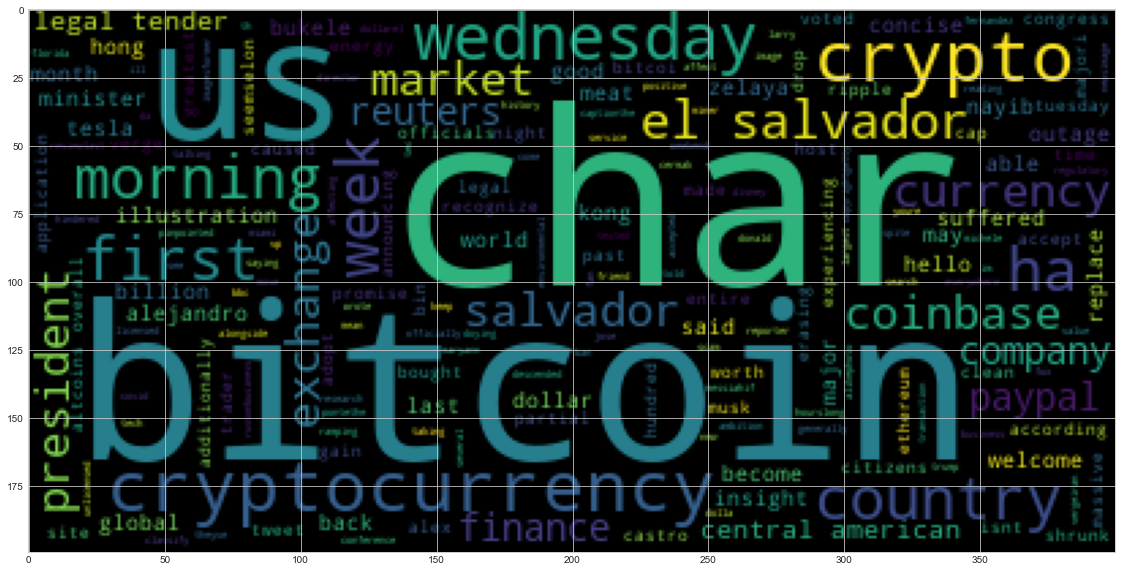

In [25]:
# Generate the Bitcoin word cloud
# YOUR CODE HERE!
bitcoin_string = ' '.join(bitcoin_corpus)
wc = WordCloud().generate(bitcoin_string)
plt.imshow(wc)

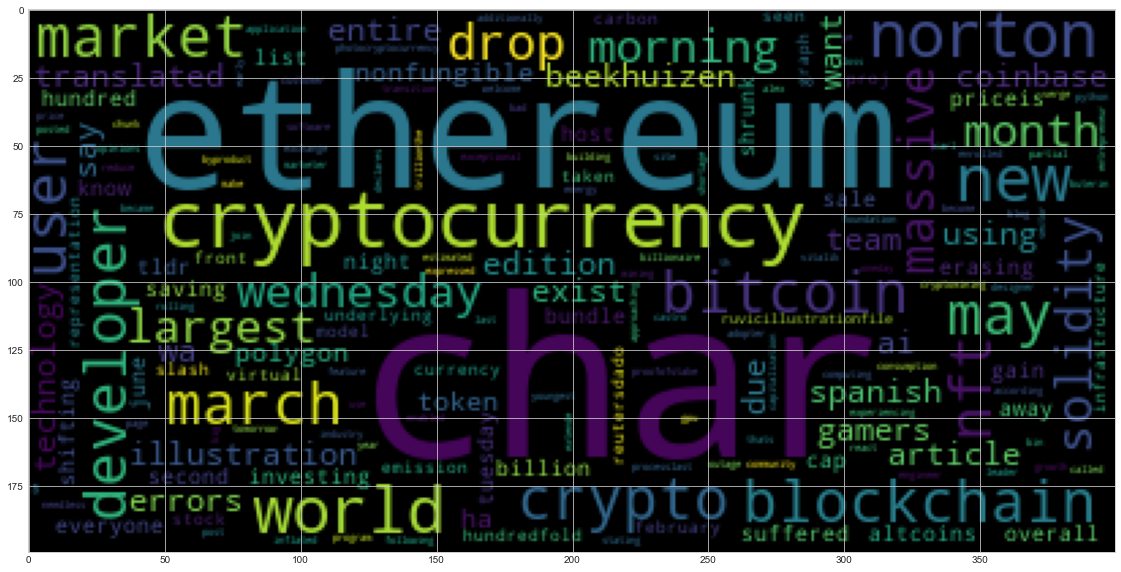

In [26]:
# Generate the Ethereum word cloud
# YOUR CODE HERE!
ethereum_string = ' '.join(ethereum_corpus)
wc = WordCloud().generate(ethereum_string)
plt.imshow(wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [ ]:
import spacy
from spacy import displacy

In [1]:
# Download the language model for SpaCy
#!python -m spacy download en_core_web_sm

In [ ]:
# Load the spaCy model
import spacy
from spacy import displacy
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [3]:
# Concatenate all of the Bitcoin text together
# YOUR CODE HERE!
bitcoin_string

NameError: name 'bitcoin_corpus' is not defined

In [ ]:
bitcoin_doc = nlp(bitcoin_string)


In [ ]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(bitcoin_doc, style='ent')


In [ ]:
# List all Entities
# YOUR CODE HERE!
for ent in bitcoin_doc.ents:
    print(ent.text, ent.label_)

---

### Ethereum NER

In [ ]:
# Concatenate all of the Ethereum text together
# YOUR CODE HERE!
ethereum_string

In [ ]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
ethereum_doc = nlp(ethereum_string)
# Add a title to the document
# YOUR CODE HERE!

In [ ]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(ethereum_doc, style='ent')

In [ ]:
# List all Entities
# YOUR CODE HERE!
for ent in ethereum_doc.ents:
    print(ent.text, ent.label_)

---